In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv("insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [48]:
df["fraud_reported"] = df["fraud_reported"].map({"Y":1,"N":0})

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [50]:
cat_col = df.select_dtypes(include=["object"])
for col in cat_col:
    print(col)
    print(f"{col} has no of unique values:", df[col].nunique())
    if df[col].nunique() < 10:
        print(df[col].unique())
    print("****")

policy_bind_date
policy_bind_date has no of unique values: 951
****
policy_state
policy_state has no of unique values: 3
['OH' 'IN' 'IL']
****
policy_csl
policy_csl has no of unique values: 3
['250/500' '100/300' '500/1000']
****
insured_sex
insured_sex has no of unique values: 2
['MALE' 'FEMALE']
****
insured_education_level
insured_education_level has no of unique values: 7
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
****
insured_occupation
insured_occupation has no of unique values: 14
****
insured_hobbies
insured_hobbies has no of unique values: 20
****
insured_relationship
insured_relationship has no of unique values: 6
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
****
incident_date
incident_date has no of unique values: 60
****
incident_type
incident_type has no of unique values: 4
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
****
collision_type
collision_type has no of unique values: 4
['S

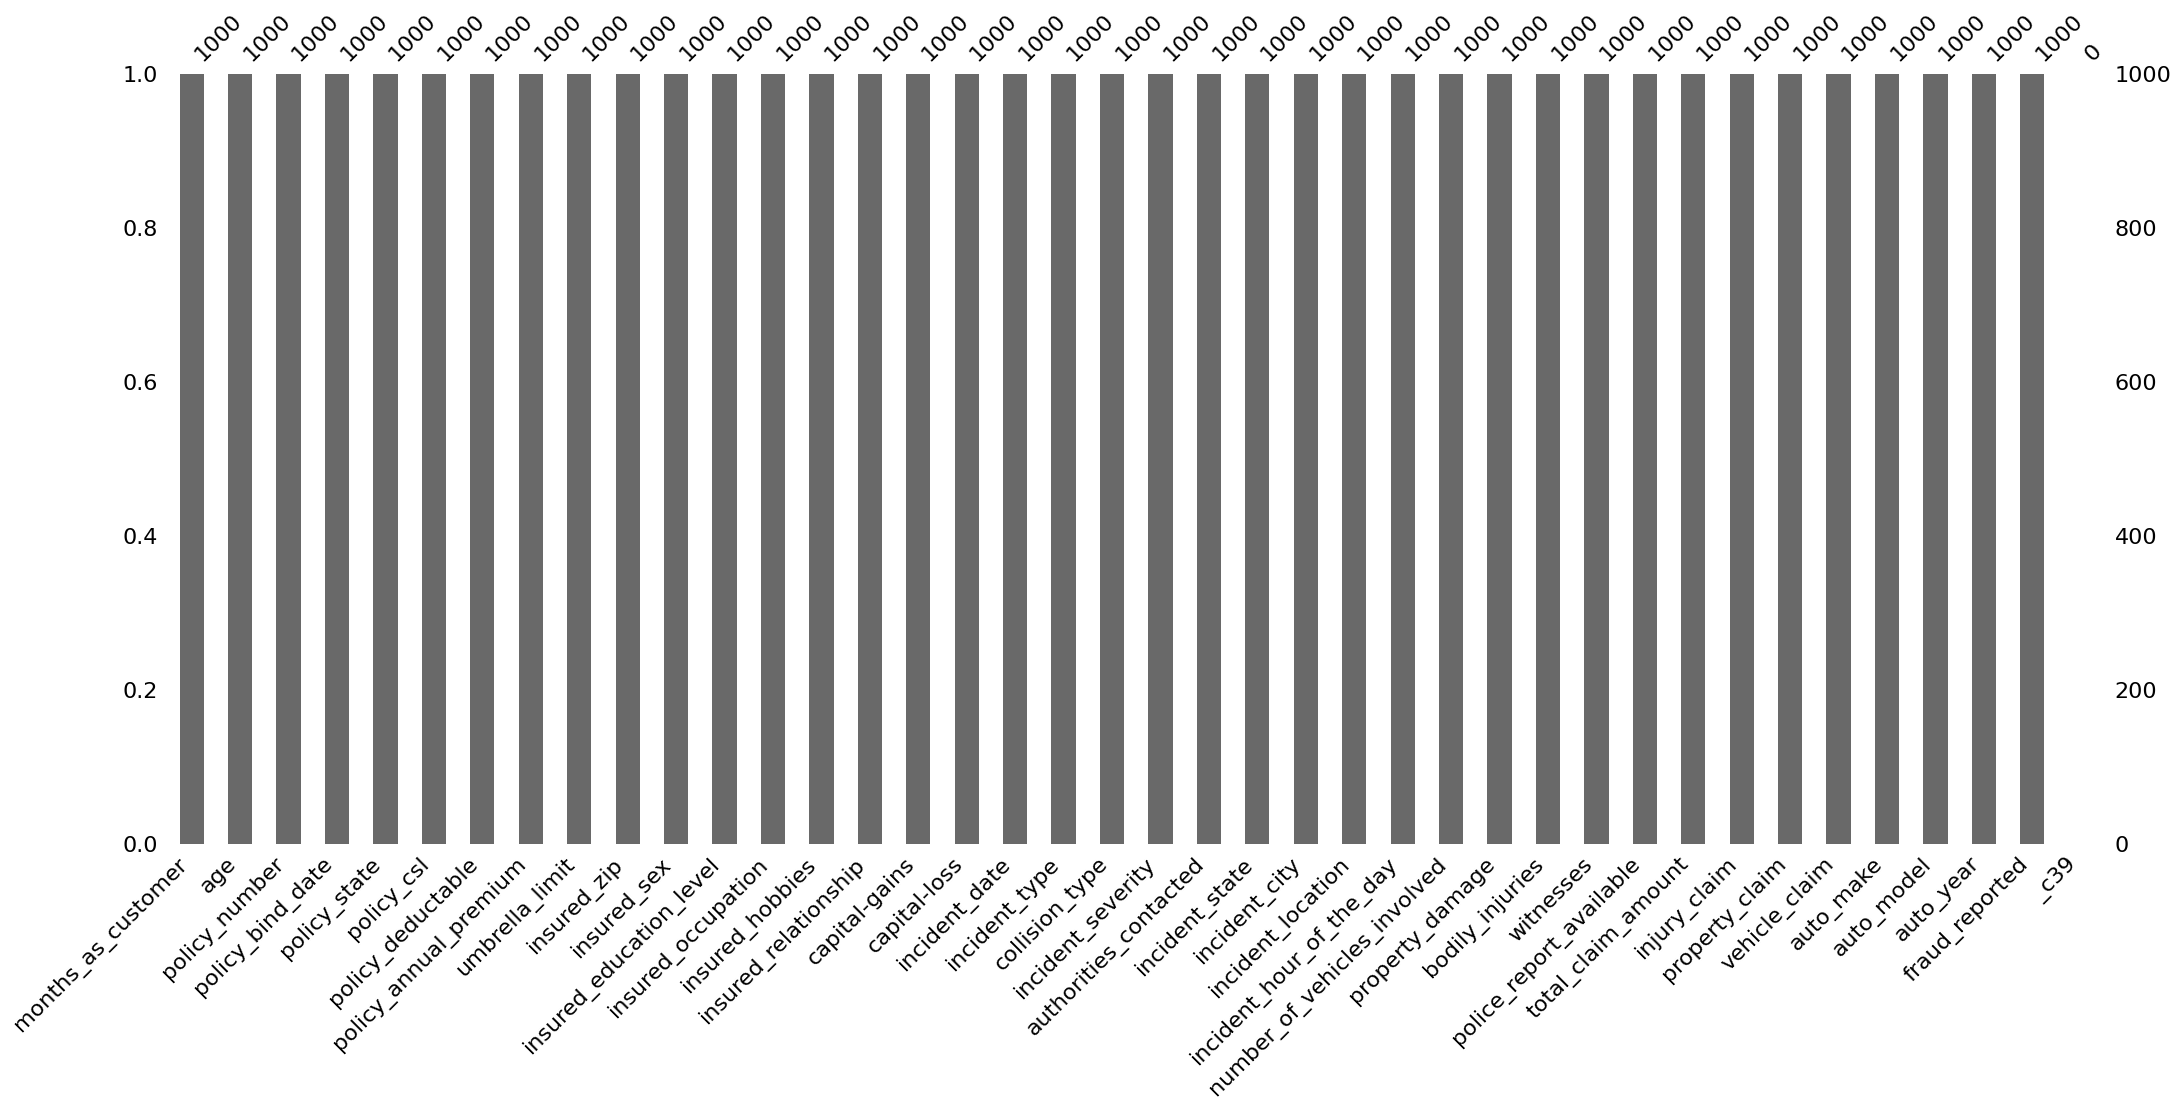

In [51]:
# pip install missingno
import missingno as msno
msno.bar(df)
plt.show()

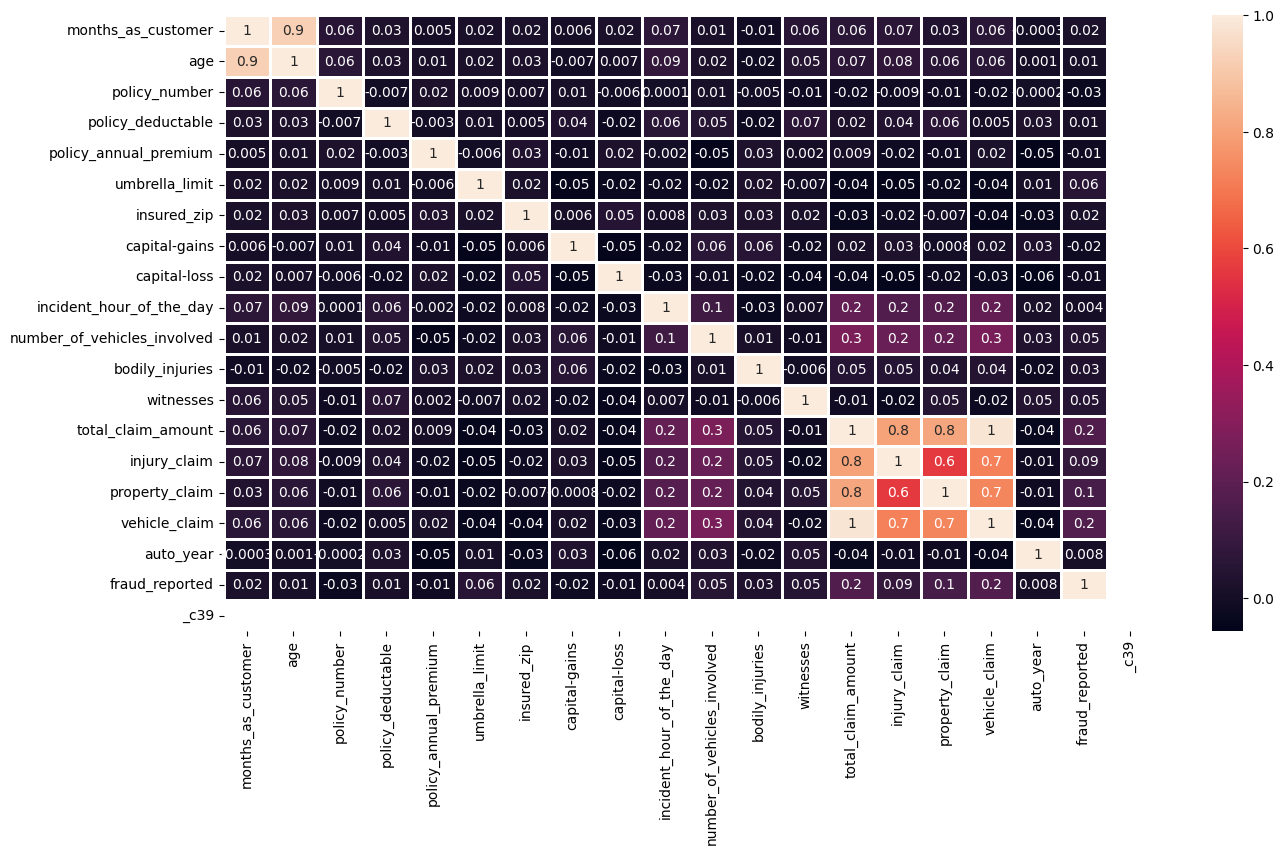

In [52]:
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr,annot = True, fmt = ".1g", linewidth = 1)
plt.show()

In [53]:
df.replace("?", np.nan, inplace = True)

In [54]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


In [55]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [56]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [57]:
drop_col = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']
df.drop(drop_col, axis = 1, inplace = True)

In [58]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

<Axes: >

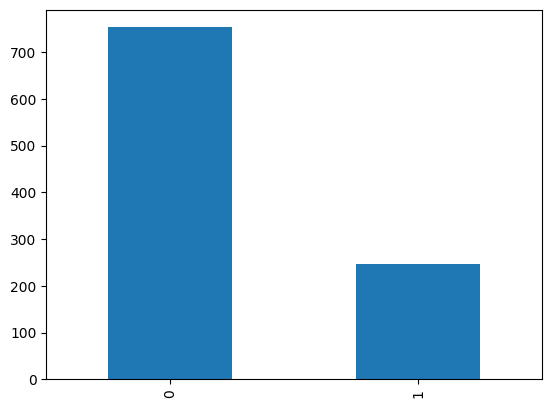

In [59]:
df["fraud_reported"].value_counts().plot(kind= "bar")

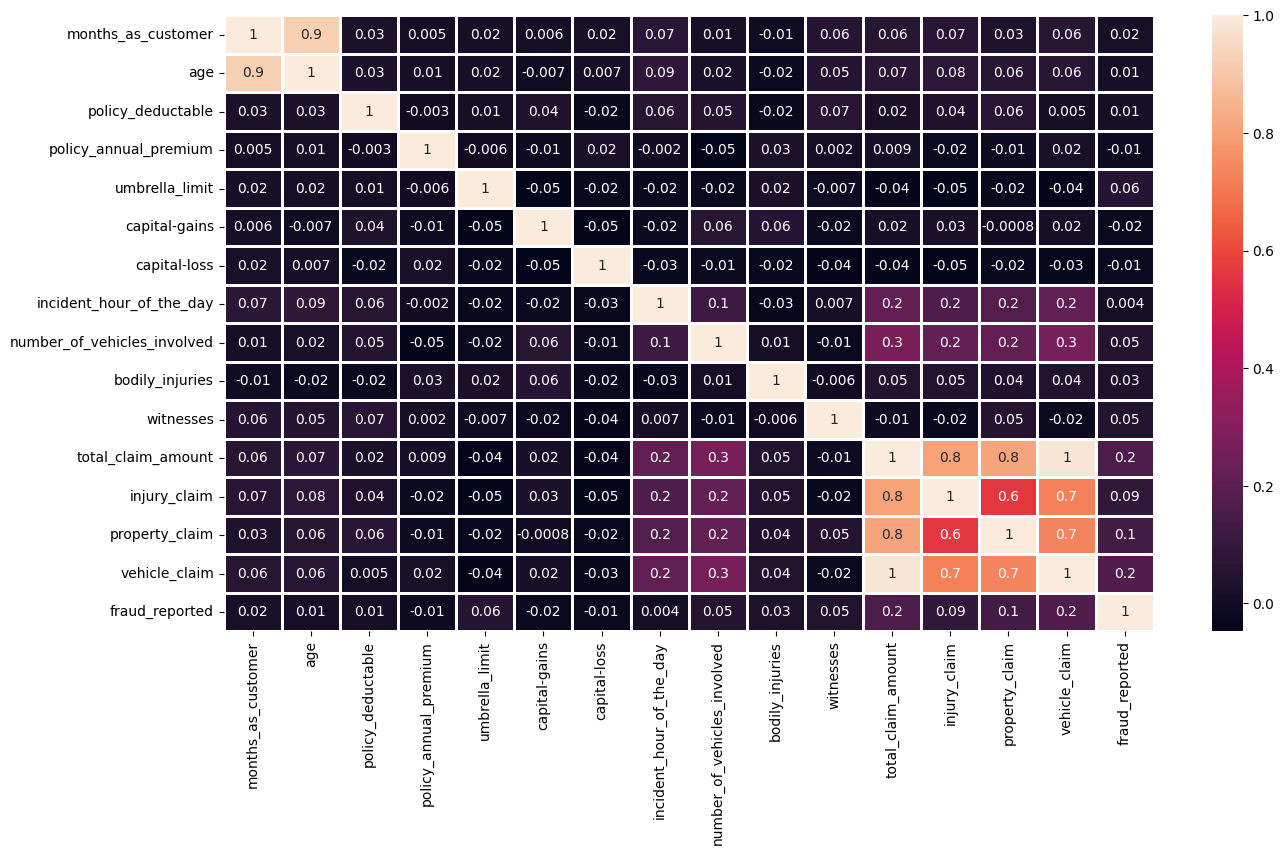

In [60]:
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr,annot = True, fmt = ".1g", linewidth = 1)
plt.show()

In [61]:
# dropping age and total claim amount columns as these two are having strong correlation with other columns
df.drop(["age","total_claim_amount"], axis = 1, inplace = True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               822 non-null    object 
 13  incident_severity  

In [63]:
X = df.drop("fraud_reported",axis= 1)
y = df["fraud_reported"]

In [64]:
cat_df = X.select_dtypes(include = "object")
print(cat_df.shape)
cat_df.head()

(1000, 11)


,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NaN,NaN
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NaN,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,NaN,Minor Damage,None,NO,NO


In [65]:
cat_df = pd.get_dummies(cat_df, drop_first= True)
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [66]:
num_df = X.select_dtypes(include="int64")
print(num_df.shape)
num_df.head()

(1000, 12)


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [67]:
X = pd.concat([num_df,cat_df],axis = 1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


In [68]:
X.shape

(1000, 53)

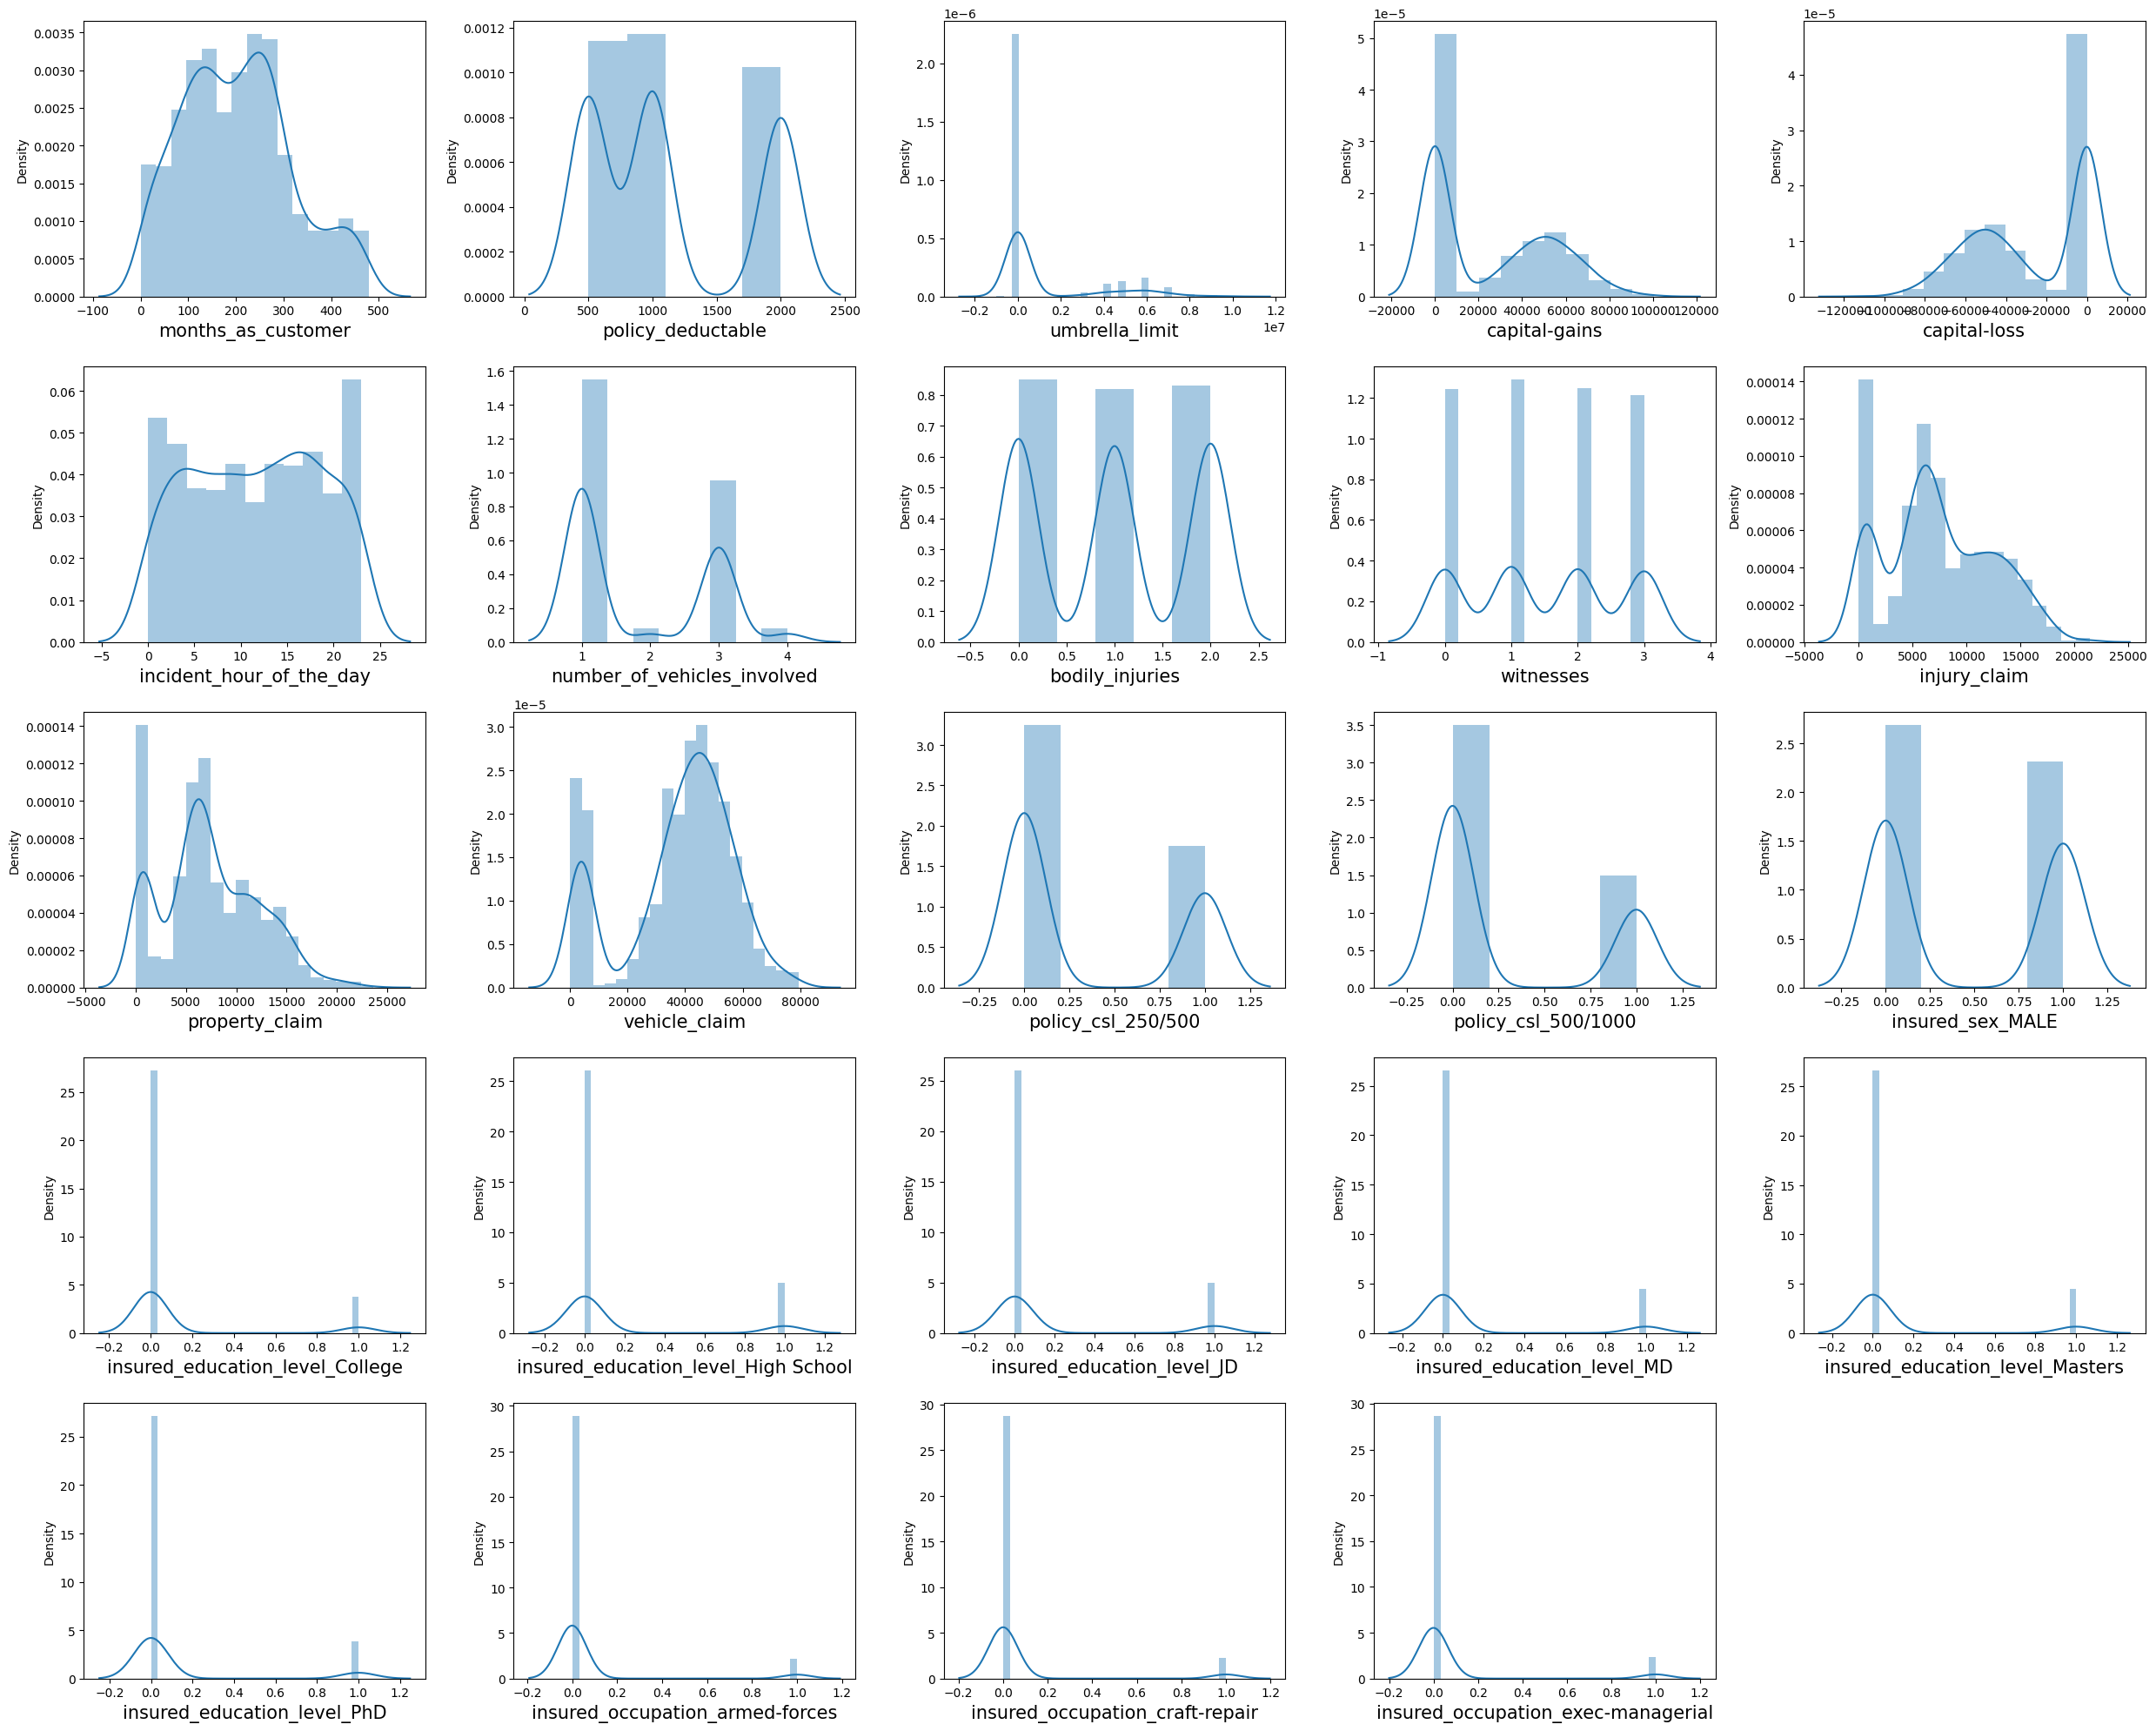

In [69]:
plt.figure(figsize= (25,20))
plot_number = 1

for col in X.columns:
    if plot_number <= 24:
        ax = plt.subplot(5,5,plot_number)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize = 15)
        
    plot_number += 1

plt.tight_layout()
plt.show()
        

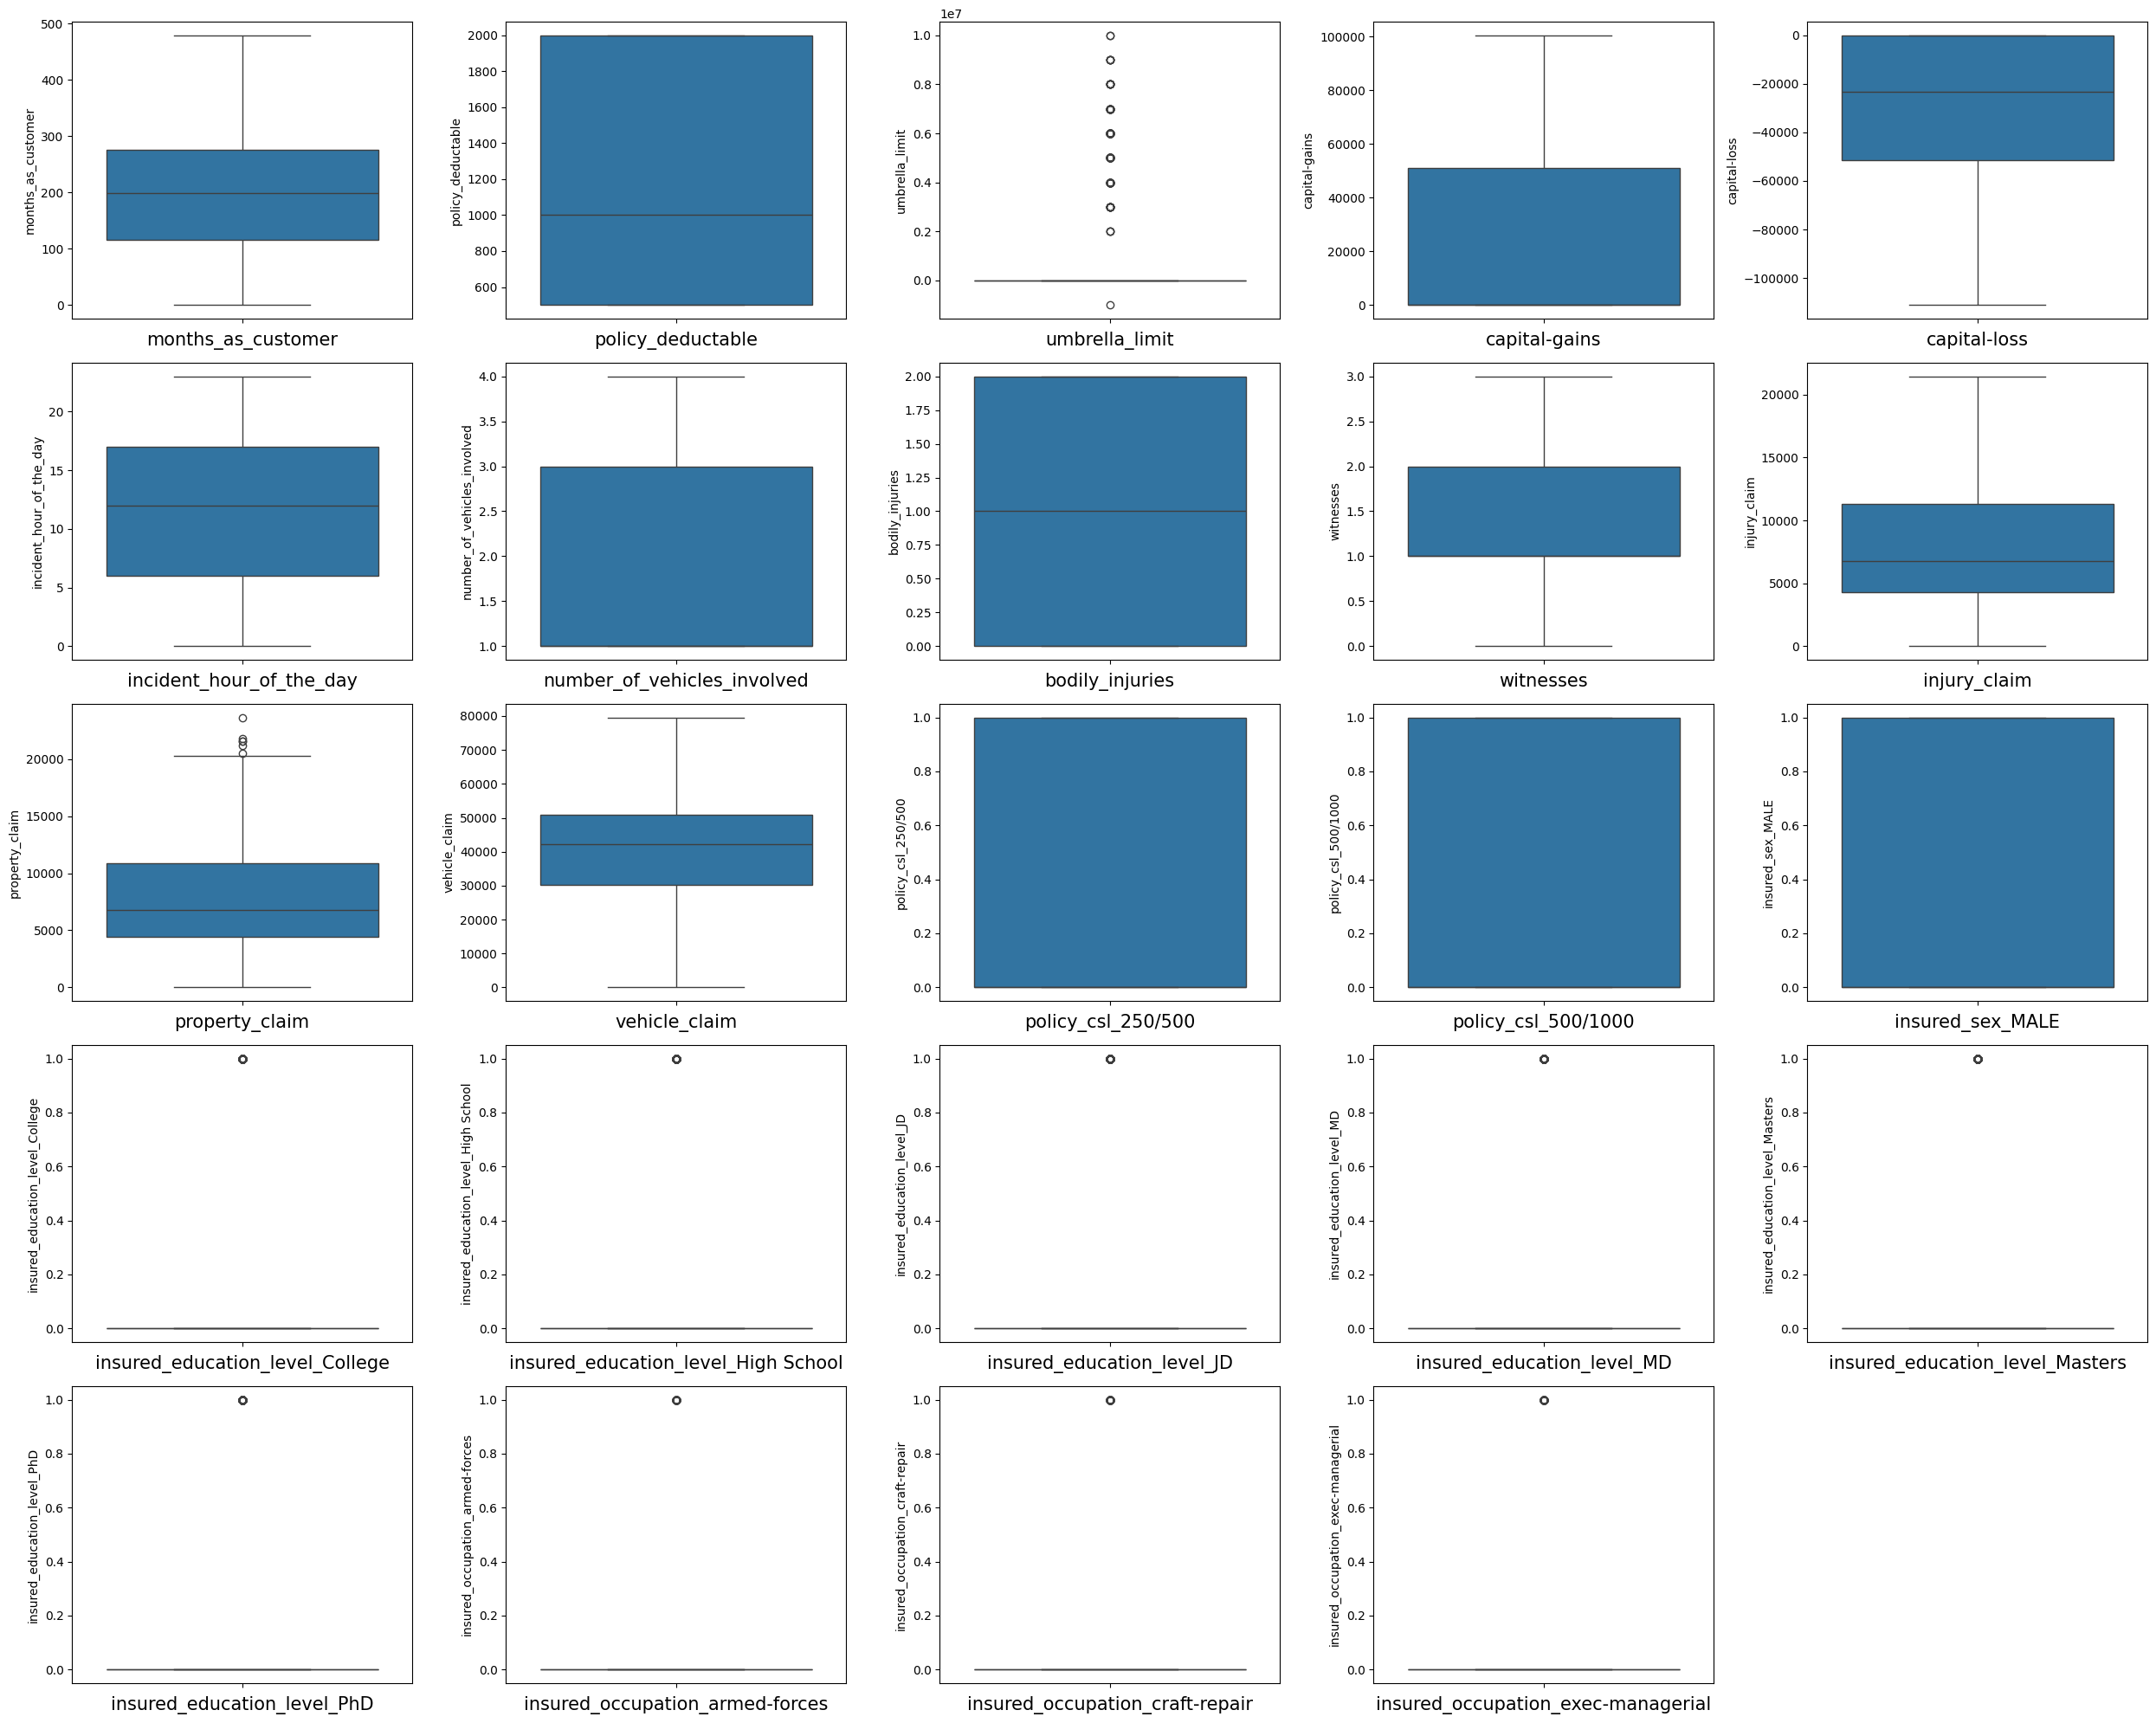

In [70]:
plt.figure(figsize= (25,20))
plot_number = 1

for col in X.columns:
    if plot_number <= 24:
        ax = plt.subplot(5,5,plot_number)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize = 15)
        
    plot_number += 1

plt.tight_layout()
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [72]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [73]:
num_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
380,265,2000,6000000,81800,0,18,3,1,3,4420,4420,35360
160,216,1000,0,39600,-82400,0,1,2,3,560,1680,3920
597,3,500,5000000,0,0,3,1,2,1,500,1000,3500
626,303,2000,5000000,0,0,1,4,1,2,12140,6070,54630
786,85,2000,0,50400,-61500,14,4,0,0,10740,5370,42960
...,...,...,...,...,...,...,...,...,...,...,...,...
945,412,500,0,0,-66100,19,3,0,2,15120,7560,45360
9,212,500,0,0,-39300,14,1,2,1,4700,4700,32900
317,275,2000,0,39400,-63900,8,3,1,1,5360,10720,48240
485,66,2000,0,0,-31700,0,1,2,1,8780,8780,30730


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [75]:
scaled_data

array([[ 0.5238085 ,  1.42973714,  2.13174734, ..., -0.61341159,
        -0.6131968 , -0.12641309],
       [ 0.10545838, -0.21742546, -0.4764264 , ..., -1.40100513,
        -1.17802962, -1.77767263],
       [-1.71308396, -1.04100677,  1.69705171, ..., -1.41324752,
        -1.31820711, -1.79973144],
       ...,
       [ 0.60918607,  1.42973714, -0.4764264 , ..., -0.4216142 ,
         0.6855064 ,  0.5500571 ],
       [-1.17520524,  1.42973714, -0.4764264 , ...,  0.27620185,
         0.28558827, -0.36958522],
       [-0.22751416,  1.42973714, -0.4764264 , ..., -1.05617791,
        -1.06052791, -1.27452166]])

In [76]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = num_df.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
380,0.523808,1.429737,2.131747,2.020438,0.955767,0.913740,1.148313,0.001641,1.346603,-0.613412,-0.613197,-0.126413
160,0.105458,-0.217425,-0.476426,0.517779,-1.949027,-1.652411,-0.820223,1.232558,1.346603,-1.401005,-1.178030,-1.777673
597,-1.713084,-1.041007,1.697052,-0.892299,0.955767,-1.224719,-0.820223,1.232558,-0.461727,-1.413248,-1.318207,-1.799731
626,0.848243,1.429737,1.697052,-0.892299,0.955767,-1.509847,2.132581,0.001641,0.442438,0.961776,-0.273060,0.885666
786,-1.012988,1.429737,-0.476426,0.902346,-1.212253,0.343484,2.132581,-1.229275,-1.365892,0.676120,-0.417361,0.272746


In [77]:
X_train = X_train.drop(num_df,axis = 1)
X_train = pd.concat([scaled_num_df,X_train],axis = 1)
X_train.shape

(750, 53)

### Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
acc_dt = accuracy_score(y_test,y_pred)
print(cm)
print(cr)
print(acc_dt)

[[ 78 115]
 [ 43  14]]
              precision    recall  f1-score   support

           0       0.64      0.40      0.50       193
           1       0.11      0.25      0.15        57

    accuracy                           0.37       250
   macro avg       0.38      0.32      0.32       250
weighted avg       0.52      0.37      0.42       250

0.368


### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
acc_rf = accuracy_score(y_test,y_pred)
print(cm)
print(cr)
print(acc_rf)

[[178  15]
 [ 43  14]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       193
           1       0.48      0.25      0.33        57

    accuracy                           0.77       250
   macro avg       0.64      0.58      0.59       250
weighted avg       0.73      0.77      0.74       250

0.768


### XGBoost classifier

In [93]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report, accuracy_score
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
acc_xgb = accuracy_score(y_test,y_pred)
print(cm)
print(cr)
print(acc_xgb)

[[145  48]
 [ 29  28]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       193
           1       0.37      0.49      0.42        57

    accuracy                           0.69       250
   macro avg       0.60      0.62      0.61       250
weighted avg       0.73      0.69      0.71       250

0.692


## Comparison

In [98]:
models = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest','XgBoost'],
    'Score' : [acc_dt, acc_rf, acc_xgb]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest,0.768
2,XgBoost,0.692
0,Decision Tree,0.368


## Feature importances

In [99]:
rf_imp = rf.feature_importances_
rf_imp

array([0.06907959, 0.02168006, 0.02307697, 0.04357906, 0.03754267,
       0.05666003, 0.01567764, 0.02002053, 0.02675229, 0.07398719,
       0.07931221, 0.07850422, 0.01079062, 0.01081569, 0.0119049 ,
       0.00753339, 0.01122268, 0.00912068, 0.01341156, 0.00720204,
       0.00856083, 0.00732869, 0.00747257, 0.00854361, 0.00682143,
       0.00776494, 0.00698437, 0.00496979, 0.00519562, 0.00562131,
       0.00401249, 0.00880789, 0.00867335, 0.00629066, 0.00813552,
       0.01001363, 0.00993967, 0.00840616, 0.00942831, 0.00341139,
       0.01186362, 0.00378362, 0.01114943, 0.01105718, 0.06696723,
       0.06106127, 0.00538705, 0.00899926, 0.0052414 , 0.00900487,
       0.01038184, 0.01075771, 0.01008928])

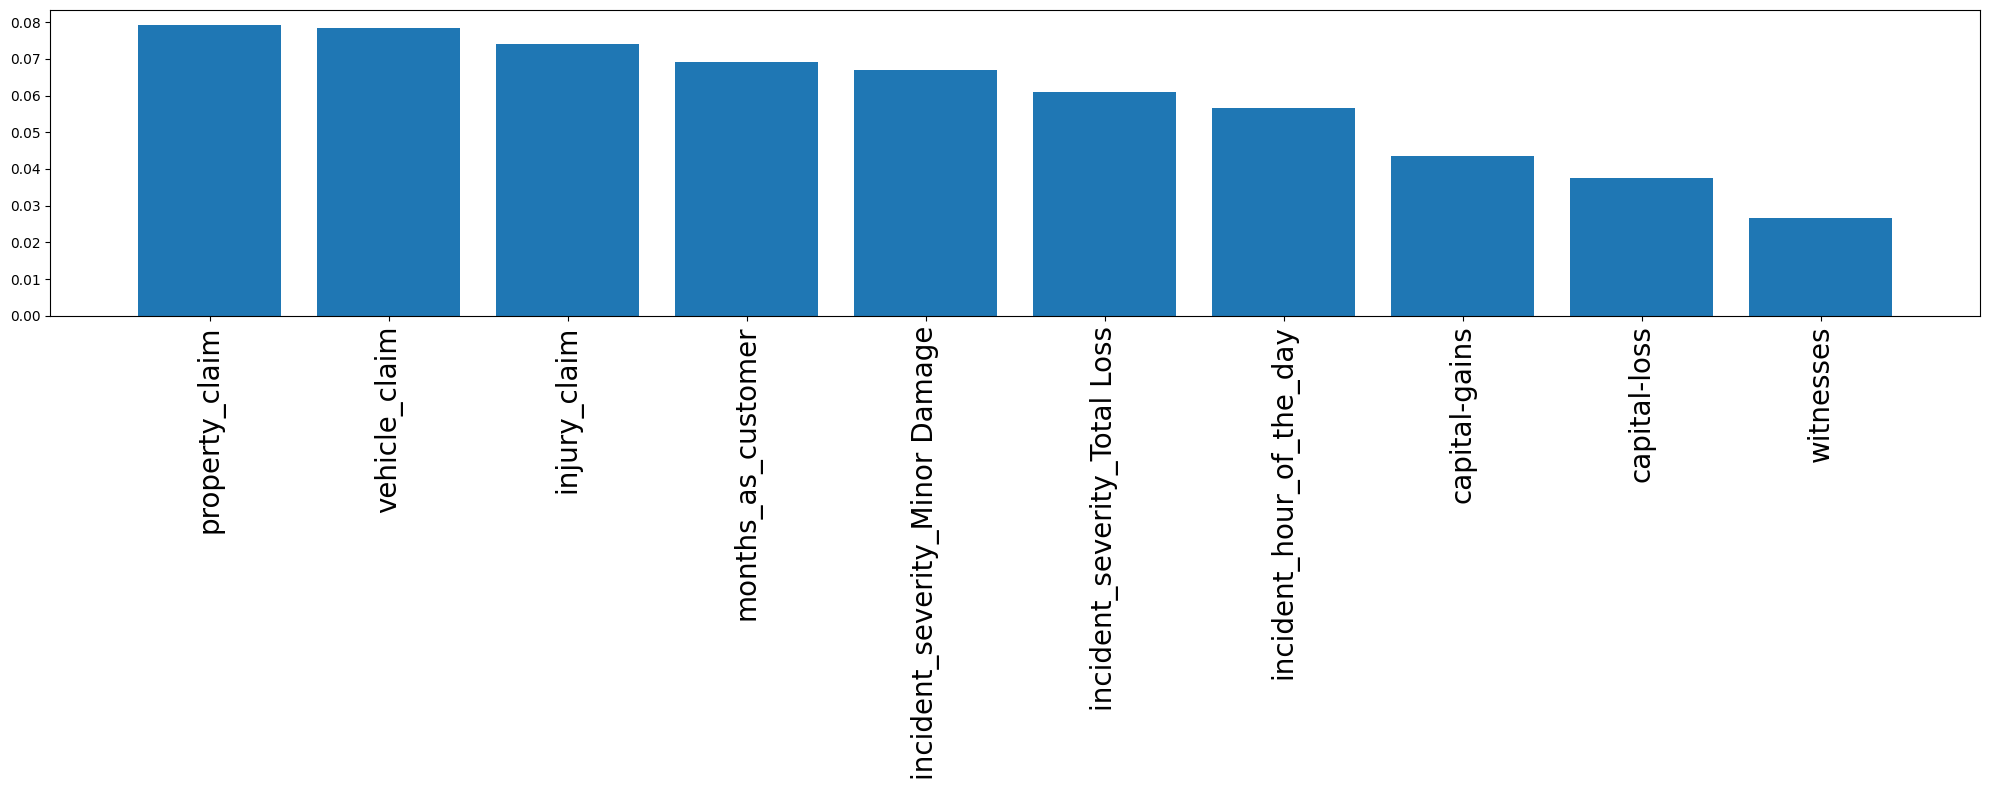

In [108]:
feature_names = X_test.columns
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1][:10]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.bar(sorted_feature_names, sorted_importances)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=90,fontsize = 20)
plt.tight_layout()
plt.show()